In [58]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

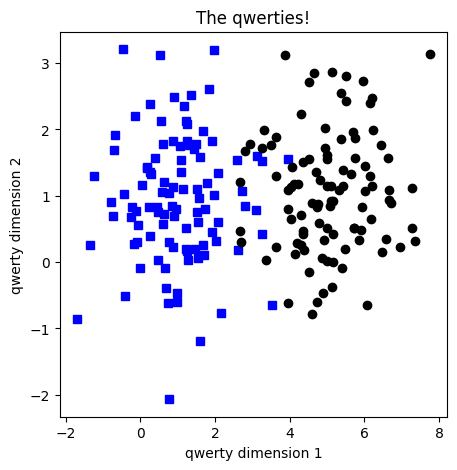

In [59]:
# create data
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [41]:
print(type(data_np))
print(np.shape(data_np))

print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(200, 2)
<class 'torch.Tensor'>
torch.Size([200, 2])


In [54]:
#  model
def model(input, output):
        ann = nn.Sequential(
                nn.Linear(2,1), # input layer
                nn.ReLU(), # activation function
                nn.Linear(1,1), # output unit
                nn.Sigmoid() # final activation function
        )
        print(ann)

        lnr = 0.01
        lossfn = nn.BCELoss()
        optimizer = torch.optim.SGD(ann.parameters(), lr=lnr)
        epochs = 1000
        losses = torch.zeros(epochs)

        for i in range(epochs):
                # forward pass
                yhat = ann(input)
                # loss
                loss = lossfn(yhat, output)
                losses[i] = loss
                # backprop
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        
        preds = ann(input)

        plt.plot(losses.detach())
        plt.xlabel('epochs')
        plt.ylabel('losses')
        plt.show()
        
        return preds, losses

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)


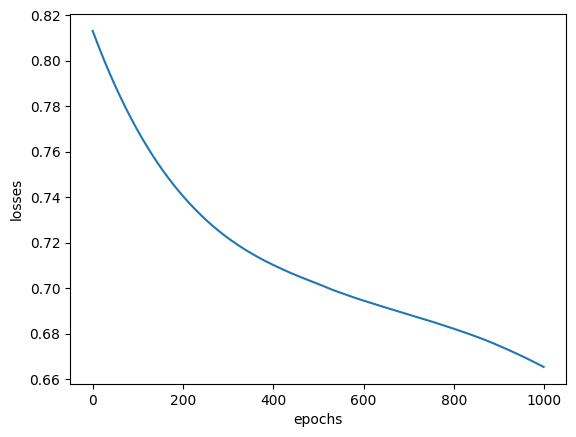

In [55]:
preds, losses = model(data, labels)

In [56]:
output = preds > 0.5
misclassification = np.where(labels != output)[0]
accuracy = 100-100*len(misclassification)/(2*nPerClust)
print(accuracy)

67.5


# Exploring the learning rates

In [61]:
#  model
def model(learning_rate):
        ann = nn.Sequential(
                nn.Linear(2,1), # input layer
                nn.ReLU(), # activation function
                nn.Linear(1,1), # output unit
                # nn.Sigmoid() # final activation function
        )
        print(ann)

        lossfn = nn.BCEWithLogitsLoss()
        optimizer = torch.optim.SGD(ann.parameters(), lr=learning_rate)

        return ann, lossfn, optimizer

In [67]:
epochs = 1000

def train(model):
    losses = torch.zeros(epochs)

    for i in range(epochs):
        # forward pass
        yhat = model(data)

        # compute loss
        loss = lossfn(yhat, labels)
        losses[i] = loss
        
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass
    preds = model(data)
    accuracy = 100*torch.mean(((preds>0)==labels).float())

    return losses, preds, accuracy

In [68]:
ann, lossfn, optimizer = model(0.01)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)


In [69]:
losses, preds, accuracy = train(ann)

In [70]:
print(accuracy)

tensor(94.5000)


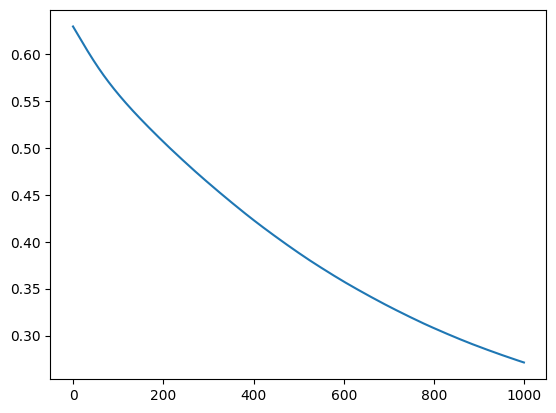

In [71]:
plt.plot(losses.detach())

# Conducting the experiment

In [73]:
learningrates = np.linspace(0.001, 0.1, 40)
accuracybylr = []
alllosses = np.zeros((len(learningrates), epochs))

for i, j in enumerate(learningrates):
    ann, lossfn, optimizer = model(j)
    losses, preds, accuracy = train(ann)

    accuracybylr.append(accuracy)
    alllosses[i,:] = losses.detach()

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)
Sequential(
  (0): L

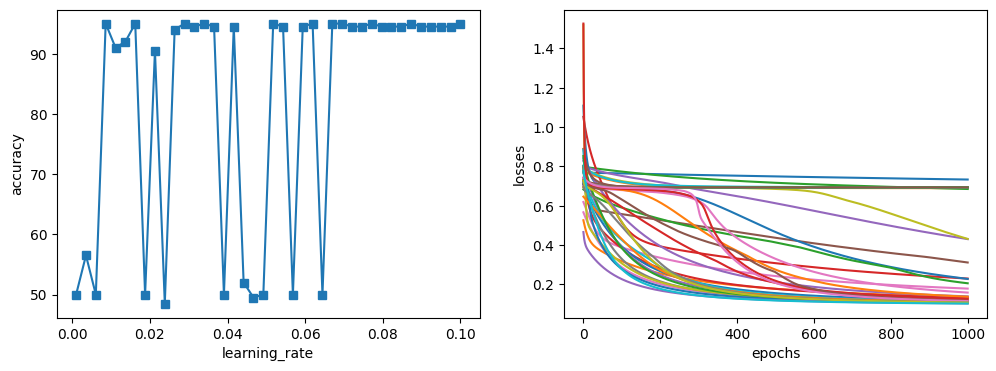

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(learningrates, accuracybylr, 's-')
ax[0].set_xlabel('learning_rate')
ax[0].set_ylabel('accuracy')
ax[1].plot(alllosses.T)
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('losses')
plt.show()